### Visualizing my Runkeeper data in one chart

In [618]:
# Import libraries
import pandas as pd
import numpy as np

# Define file path containing dataset
file_path = 'cardioActivities.csv'

# Create a DataFrame
activities = pd.read_csv(file_path, parse_dates=True, index_col='Date')
activities.sort_index()

# Peak at the data
activities.head()

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2021-02-13 13:37:15,93d1e08e-c6af-45ed-9847-35342d53b02b,Running,NaN,5.34,31:45,5:57,10.09,394.0,117,NaN,NaN,NaN,2021-02-13-133715.gpx
2021-01-06 19:48:33,ac2992d9-68eb-4843-9779-5af6b012836b,Running,NaN,5.53,31:46,5:45,10.44,404.0,108,NaN,NaN,NaN,2021-01-06-194833.gpx
2021-01-02 22:20:37,dfb6ddfe-7c6d-4f78-a8e5-d4eaf1d3fc74,Running,NaN,4.35,22:55,5:17,11.37,314.0,83,NaN,NaN,NaN,2021-01-02-222037.gpx
2020-12-31 12:25:52,234468d9-67e7-4961-950e-a6e32344ae8f,Running,NaN,22.13,2:12:18,5:59,10.04,1613.0,315,NaN,NaN,NaN,2020-12-31-122552.gpx
2020-12-28 21:42:58,30d890b9-4caa-4f41-8f28-d0e2aee50fb5,Running,NaN,4.57,25:45,5:38,10.64,326.0,93,NaN,NaN,NaN,2020-12-28-214258.gpx


In [619]:
# Define list of columns to be droped
cols_to_drop = ['Activity Id', 'Type','Route Name', "Average Heart Rate (bpm)", 'GPX File', "Friend's Tagged"]

# Delete unnecessary columns
activities.drop(columns=cols_to_drop, inplace=True)

# Count missing values
activities.isnull().sum()

Distance (km)             0
Duration                  0
Average Pace              1
Average Speed (km/h)      1
Calories Burned           0
Climb (m)                 0
Notes                   277
dtype: int64

In [620]:
# Drop the row with missing values
activities.drop(activities[activities["Average Pace"].isnull()].index, axis=0, inplace=True)

In [621]:
# I tracked some long run that I want to highlight
marathons = activities[activities['Distance (km)'] > 41].reset_index()
year_2020 = activities["2020"]
san_silvestre = year_2020[year_2020['Distance (km)'] > 21].reset_index()
marathons

,Date,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Notes
0,2018-04-22 09:11:23,43.58,4:19:14,5:57,10.09,3149.0,820,NaN
1,2016-10-16 09:45:37,42.66,4:03:07,5:42,10.53,2952.0,321,NaN


In [623]:
activities

,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Notes
Date,,,,,,,
2021-02-13 13:37:15,5.34,31:45,5:57,10.09,394.0,117,NaN
2021-01-06 19:48:33,5.53,31:46,5:45,10.44,404.0,108,NaN
2021-01-02 22:20:37,4.35,22:55,5:17,11.37,314.0,83,NaN
2020-12-31 12:25:52,22.13,2:12:18,5:59,10.04,1613.0,315,NaN
2020-12-28 21:42:58,4.57,25:45,5:38,10.64,326.0,93,NaN
...,...,...,...,...,...,...,...
2013-11-02 19:23:46,13.31,1:20:22,6:02,9.94,942.0,100,After I had finished running I had feelings of...
2013-11-01 10:50:52,6.74,37:57,5:38,10.65,480.0,52,NaN
2013-10-30 19:35:56,7.00,38:39,5:31,10.86,492.0,58,NaN


#### Let's plot!

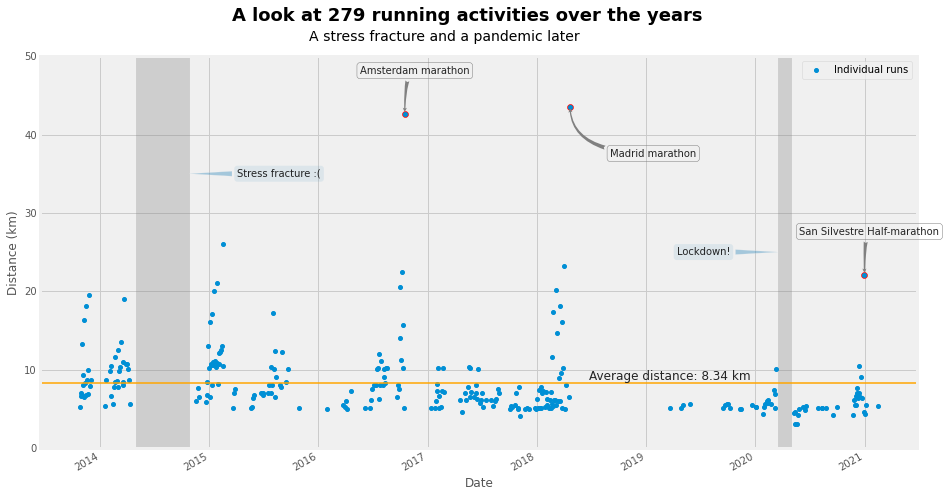

In [639]:
# Import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime, timedelta
%matplotlib inline

# Plot distance run
activities['Distance (km)'].plot(figsize=(14,8), linestyle='none', marker='o', markersize=4, label="Individual runs")
plt.ylim(0, 50)
plt.ylabel('Distance (km)')

# Annotate the marathons
plt.annotate("Amsterdam marathon", xy= (marathons.iloc[1]['Date'],marathons.iloc[1]['Distance (km)']), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, 40), textcoords='offset points', ha='center', alpha = .85,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.5", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate("Madrid marathon", xy=(marathons.iloc[0]['Date'],marathons.iloc[0]['Distance (km)']), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(40, -50), textcoords='offset points', alpha = .85,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.5", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate("San Silvestre Half-marathon", xy=(san_silvestre['Date'],san_silvestre['Distance (km)']), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(5, 40), textcoords='offset points', ha='center', alpha = .85,
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.5", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

# Highlight color for longer runs
plt.scatter(marathons.Date, marathons['Distance (km)'], c='red')
plt.scatter(san_silvestre.Date, san_silvestre['Distance (km)'], c='red')


# Plot the average distance run
plt.axhline(activities['Distance (km)'].mean(), color='orange', linewidth=1.5, linestyle='-')
plt.text(x = '2018-06-25', y = 8.7,
            s = f"Average distance: {activities['Distance (km)'].mean():.2f} km",
            fontsize = 12, alpha = .85)

# Plot the inactivity span
plt.axvspan(datetime(2014,5,1), datetime(2014,10,25), color='gray', alpha=0.3)

plt.annotate("Stress fracture :(", xy=(datetime(2014,10,20), 35), xycoords='data',
            bbox=dict(boxstyle="round", alpha=0.1),
            xytext=(50, 0), textcoords='offset points', alpha = .85,
            ha='left', va="center",
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))


plt.axvspan(datetime(2020,3,18), datetime(2020,5,1), color='gray', alpha=0.3)

plt.annotate("Lockdown!", xy=(datetime(2020,3,25), 25), xycoords='data',
            bbox=dict(boxstyle="round", alpha=0.1),
            xytext=(-50, 0), textcoords='offset points', alpha = .85,
            ha='right', va="center",
            arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.4))


plt.text(x=datetime(2015,3,18), y=54.5, s="A look at 279 running activities over the years", size=18, weight='bold')
plt.text(x=datetime(2015,11,30), y=52, s="A stress fracture and a pandemic later", size=14)

# Show plot
plt.legend()
plt.show()

#### Running statistics

In [640]:
print(f"Total distance run: {activities['Distance (km)'].sum():.2f} km")
print(f"Average running distance: {activities['Distance (km)'].mean():.2f} km")
print(f"Number of runs: {len(activities)}")

Total distance run: 2326.64 km
Average running distance: 8.34 km
Number of runs: 279


In [641]:
# Calculate average pace
activities['Average Pace - TimeDelta'] = pd.to_timedelta('00:'+ activities['Average Pace'])
yearly_average_pace = activities['Average Pace - TimeDelta'].resample('A').mean()

# Transform in the format m:s
yearly_average_pace = yearly_average_pace.dt.components[['minutes', 'seconds']]
yearly_average_pace = yearly_average_pace.astype(str)
yearly_average_pace['Average_pace'] = yearly_average_pace[['minutes','seconds']].agg(':'.join, axis=1)
yearly_average_pace.sort_index()
yearly_average_pace

,minutes,seconds,Average_pace
Date,,,
2013-12-31,5,44,5:44
2014-12-31,5,45,5:45
2015-12-31,5,26,5:26
2016-12-31,5,29,5:29
2017-12-31,5,18,5:18
2018-12-31,5,25,5:25
2019-12-31,6,3,6:3
2020-12-31,5,58,5:58
2021-12-31,5,39,5:39


In [642]:
# Calculate run duration
activities['Duration'].str.split(':')
time_components = []
for lst in activities['Duration'].str.split(':'):
    if len(lst) == 2:
        lst.insert(0,"0")
        time_components.append(lst)
    else:
        time_components.append(lst)

In [644]:
# Create a function to buid time_delta
def make_delta(entry):
    h, m, s = entry
    return timedelta(hours=int(h), minutes=int(m), seconds=int(s))

In [645]:
activities['Duration-TimeComponents'] = time_components

# Sum the duration to find the total
activities['Time_delta'] = activities[['Duration-TimeComponents']].applymap(lambda entry: make_delta(entry))
activities['Time_delta'].sum()

Timedelta('9 days 00:07:16')